<a href="https://colab.research.google.com/github/lioba00700/-gyeongbuk_swai/blob/main/SWAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%env CUDA_LAUNCH_BLOCKING=1


env: CUDA_LAUNCH_BLOCKING=1


In [ ]:
import os
os.environ['TORCH_USE_CUDA_DSA'] = '1'


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 24.4 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python-headless

In [ ]:
from ultralytics import YOLO
import cv2
import os
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
yaml_content = """
path: /content/drive/MyDrive/SWAI_data
train: /content/drive/MyDrive/SWAI_data/images/train
val: /content/drive/MyDrive/SWAI_data/images/test
names:
  0: object
"""

# yaml 파일 생성
with open("/content/drive/MyDrive/SWAI_data/SWAI_data.yaml", "w") as file:
    file.write(yaml_content)

print("SWAI_data.yaml 파일이 /content/drive/MyDrive/SWAI_data 경로에 생성되었습니다.")


SWAI_data.yaml 파일이 /content/drive/MyDrive/SWAI_data 경로에 생성되었습니다.


In [ ]:
from ultralytics import YOLO
from time import strftime

if __name__ == "__main__":
    # 모델 파라미터 설정
    epochs = 50
    imgsz = 640
    augmentation = True
    size = 'n'  # 사용할 YOLO 모델 크기 (nano, small 등)
    optimizer = 'AdamW'
    lr = 0.001
    batch = 8  # GPU 메모리에 맞게 조정
    model = YOLO(f'yolov8{size}.pt')

    # 간단한 이름 설정
    model_name = f"SWAI_{size}_{strftime('%Y%m%d')}"

    # 학습 설정 및 실행
    if not augmentation:
        result = model.train(
            data='/content/drive/MyDrive/SWAI_data/SWAI_data.yaml',  # 이미 생성된 YAML 파일 경로
            epochs=epochs,
            optimizer=optimizer,
            name=model_name,
            imgsz=imgsz,
            lr0=lr,
            cos_lr=True,
            batch=batch
        )
    else:
        result = model.train(
            data='/content/drive/MyDrive/SWAI_data/SWAI_data.yaml',  # 이미 생성된 YAML 파일 경로
            epochs=epochs,
            optimizer=optimizer,
            name=f"{model_name}_aug",
            imgsz=imgsz,
            lr0=lr,
            cos_lr=True,
            batch=batch,
            # 데이터 증강 설정
            hsv_h=0.015,  # 이미지 색조
            hsv_s=0.7,    # 이미지 채도
            hsv_v=0.4,    # 이미지 명도
            degrees=0.5,  # 이미지 회전
            translate=0.1, # 이미지 이동
            scale=0.3,    # 이미지 크기
            fliplr=0.5,   # 좌우반전 확률
            mosaic=0.3,   # 모자이크 확률
            mixup=0.1     # 믹스업 확률
        )

    # 모델 저장
    model_path = 'yolov8_custom_model.pt'
    model.save(model_path)
    print(f"Model saved to {model_path}")

    # 모델 내보내기
    model.export(format="onnx")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 114MB/s]


Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/SWAI_data/SWAI_data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=SWAI_n_20241112_aug, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 85.1MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/SWAI_data/labels/train... 108 images, 8 backgrounds, 0 corrupt: 100%|██████████| 116/116 [00:58<00:00,  1.97it/s]

train: New cache created: /content/drive/MyDrive/SWAI_data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/SWAI_data/labels/test... 3 images, 2 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

val: New cache created: /content/drive/MyDrive/SWAI_data/labels/test.cache


Plotting labels to runs/detect/SWAI_n_20241112_aug/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/SWAI_n_20241112_aug
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.23G      1.553      3.579      1.508         14        640: 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all          5         11    0.00928      0.909      0.552      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.21G      1.556      2.563       1.43         18        640: 100%|██████████| 15/15 [00:02<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          5         11    0.00667      0.909      0.541      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.21G      1.485      2.167      1.366          8        640: 100%|██████████| 15/15 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          5         11          1      0.417      0.554      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.21G      1.536      2.037      1.387         10        640: 100%|██████████| 15/15 [00:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all          5         11      0.491      0.545      0.364      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.21G      1.525      1.736      1.374         24        640: 100%|██████████| 15/15 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all          5         11      0.476      0.364      0.323      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.21G      1.481       1.64      1.305         10        640: 100%|██████████| 15/15 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]


                   all          5         11      0.714      0.545       0.55      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.21G      1.355      1.525      1.218         13        640: 100%|██████████| 15/15 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all          5         11      0.599      0.544      0.486      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.21G      1.368      1.502      1.241          6        640: 100%|██████████| 15/15 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]

                   all          5         11      0.525      0.636      0.433      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.21G      1.321      1.368      1.185         16        640: 100%|██████████| 15/15 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all          5         11      0.571      0.545      0.509      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.21G      1.314      1.333      1.224         12        640: 100%|██████████| 15/15 [00:02<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all          5         11      0.593      0.545      0.669      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.21G      1.389      1.364      1.263         12        640: 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          5         11      0.595      0.545      0.711       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.21G      1.358      1.454      1.227         14        640: 100%|██████████| 15/15 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all          5         11      0.615      0.871        0.7      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.22G      1.346      1.353      1.245         11        640: 100%|██████████| 15/15 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]

                   all          5         11      0.711      0.895      0.811      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.21G      1.396      1.345      1.244         18        640: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]


                   all          5         11      0.767      0.636      0.782      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.21G      1.246       1.26      1.192          8        640: 100%|██████████| 15/15 [00:02<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all          5         11      0.775      0.626      0.646      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.22G       1.25      1.253      1.217         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all          5         11      0.669      0.818      0.733      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.21G      1.277      1.234      1.179         24        640: 100%|██████████| 15/15 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all          5         11      0.648      0.909      0.787      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.22G      1.333      1.318      1.251         18        640: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all          5         11      0.561          1       0.84       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.21G      1.249      1.207      1.187          5        640: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all          5         11      0.757      0.636      0.818      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.2G      1.222       1.14      1.175          6        640: 100%|██████████| 15/15 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all          5         11      0.773      0.636      0.786      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.22G      1.177      1.149      1.149         17        640: 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all          5         11       0.62      0.636       0.74       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.21G      1.211      1.136      1.175          8        640: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all          5         11       0.62      0.636      0.684      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.21G      1.225      1.156      1.188         13        640: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all          5         11      0.537      0.843      0.712      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.21G      1.188      1.094      1.168         10        640: 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all          5         11      0.699      0.909      0.735      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.22G      1.145      1.045      1.128         18        640: 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


                   all          5         11      0.711      0.909      0.779       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.22G      1.122      1.068      1.117         16        640: 100%|██████████| 15/15 [00:02<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all          5         11      0.551      0.893      0.766      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.21G      1.194      1.122      1.192         10        640: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


                   all          5         11      0.798      0.727      0.812      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       1.2G      1.181      1.067      1.172         16        640: 100%|██████████| 15/15 [00:02<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all          5         11      0.772      0.727      0.822      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.21G      1.156      1.057      1.146          4        640: 100%|██████████| 15/15 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          5         11      0.815      0.803      0.846      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.22G      1.162      1.032      1.143         18        640: 100%|██████████| 15/15 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]

                   all          5         11      0.588      0.909      0.814      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.22G      1.141      1.021      1.134         10        640: 100%|██████████| 15/15 [00:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all          5         11      0.546      0.818       0.79      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.22G      1.086     0.9991      1.109          8        640: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all          5         11      0.578      0.818      0.789      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.21G      1.102     0.9439      1.098         12        640: 100%|██████████| 15/15 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]


                   all          5         11      0.681       0.78      0.829      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.22G       1.17      1.045      1.175         18        640: 100%|██████████| 15/15 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]


                   all          5         11      0.638      0.961      0.836      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.21G      1.072     0.9424      1.106         12        640: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all          5         11      0.622      0.909      0.822       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.2G      1.103     0.9678      1.114         18        640: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all          5         11      0.549          1      0.798       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.22G      1.103     0.9575      1.112         11        640: 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          5         11      0.549          1      0.784      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.21G      1.068     0.9544      1.089          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all          5         11      0.543          1      0.775      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.21G      1.005     0.9303      1.068          4        640: 100%|██████████| 15/15 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all          5         11      0.541          1       0.78      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.22G      1.087      0.946      1.118          8        640: 100%|██████████| 15/15 [00:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all          5         11      0.538          1       0.78      0.655


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.21G     0.9797     0.8344      1.065          8        640: 100%|██████████| 15/15 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all          5         11      0.555          1      0.799       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.21G     0.9647     0.8497      1.031          6        640: 100%|██████████| 15/15 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


                   all          5         11      0.567          1      0.788      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.21G     0.9325      0.826     0.9903          6        640: 100%|██████████| 15/15 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.28it/s]

                   all          5         11      0.566          1      0.788      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       1.2G     0.9171     0.8198      1.018          6        640: 100%|██████████| 15/15 [00:02<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all          5         11      0.565          1      0.788      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.22G     0.9299     0.8555      1.034         13        640: 100%|██████████| 15/15 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]

                   all          5         11      0.555          1      0.788       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.21G     0.9154     0.8151      1.025          8        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all          5         11      0.557          1      0.811      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.21G     0.9406     0.7846      1.031         12        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]

                   all          5         11      0.561          1      0.811      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.21G     0.9233      0.792      1.014          6        640: 100%|██████████| 15/15 [00:02<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all          5         11      0.566          1      0.811      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.21G     0.9166     0.7974      1.027          9        640: 100%|██████████| 15/15 [00:02<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.14it/s]

                   all          5         11      0.567          1      0.811      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.21G     0.9513     0.8234      1.023          9        640: 100%|██████████| 15/15 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all          5         11      0.568          1      0.811      0.692



50 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/SWAI_n_20241112_aug/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/SWAI_n_20241112_aug/weights/best.pt, 6.2MB

Validating runs/detect/SWAI_n_20241112_aug/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.34it/s]


                   all          5         11      0.566          1      0.811      0.696
                  line          3         11      0.566          1      0.811      0.696
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/SWAI_n_20241112_aug
Model saved to yolov8_custom_model.pt
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/SWAI_n_20241112_aug/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 274.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.7/141.7 kB 299.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



image 1/1 /content/drive/MyDrive/SWAI_data/images/test/labeling_img3 (18).jpg: 384x640 4 lines, 1 green_sign, 40.7ms
Speed: 1.8ms preprocess, 40.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


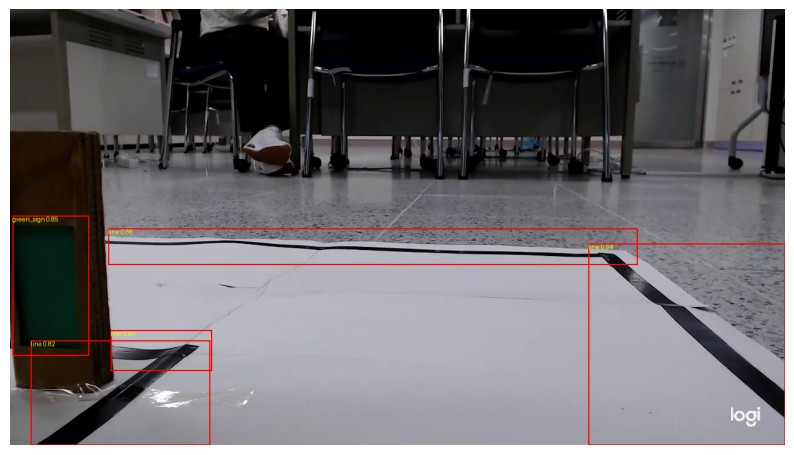

In [5]:
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# 모델 로드
model = YOLO('runs/detect/SWAI_n_20241112_aug/weights/best.pt')

# 테스트할 이미지 경로
test_image_path = '/content/drive/MyDrive/SWAI_data/images/test/labeling_img3 (18).jpg'

# 예측 수행
results = model.predict(source=test_image_path, save=False, imgsz=640)

# 원본 이미지 로드
img = Image.open(test_image_path)
draw = ImageDraw.Draw(img)

# 바운딩 박스 그리기
for box in results[0].boxes:
    # 바운딩 박스 좌표 (x1, y1, x2, y2)
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    # 클래스 이름과 확률
    class_id = int(box.cls)
    class_name = results[0].names[class_id]
    confidence = box.conf[0]

    # 바운딩 박스와 텍스트 그리기
    draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
    draw.text((x1, y1), f"{class_name} {confidence:.2f}", fill="yellow")

# 시각화
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()



image 1/1 /content/drive/MyDrive/SWAI_data/images/test/labeling_img5 (7).jpg: 384x640 3 lines, 2 obstacles, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


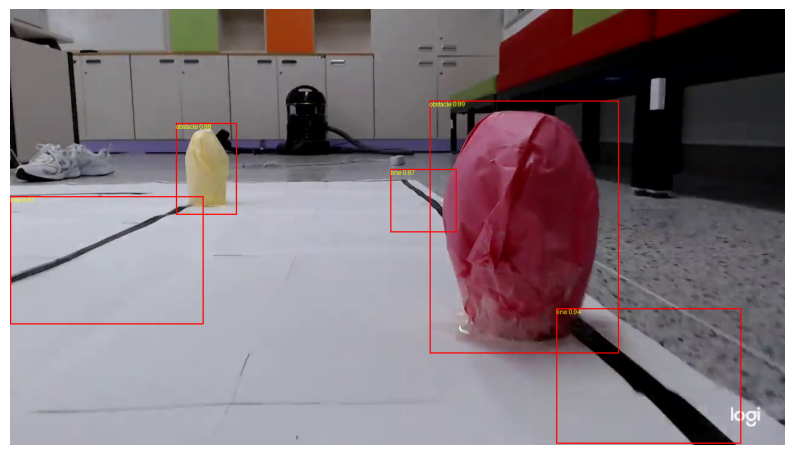

In [6]:
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# 모델 로드
model = YOLO('runs/detect/SWAI_n_20241112_aug/weights/best.pt')

# 테스트할 이미지 경로
test_image_path = '/content/drive/MyDrive/SWAI_data/images/test/labeling_img5 (7).jpg'

# 예측 수행
results = model.predict(source=test_image_path, save=False, imgsz=640)

# 원본 이미지 로드
img = Image.open(test_image_path)
draw = ImageDraw.Draw(img)

# 바운딩 박스 그리기
for box in results[0].boxes:
    # 바운딩 박스 좌표 (x1, y1, x2, y2)
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    # 클래스 이름과 확률
    class_id = int(box.cls)
    class_name = results[0].names[class_id]
    confidence = box.conf[0]

    # 바운딩 박스와 텍스트 그리기
    draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
    draw.text((x1, y1), f"{class_name} {confidence:.2f}", fill="yellow")

# 시각화
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()
